# **<u>ONLINE FOOD DELIVERY PROFITABILITY ANALYSIS</u>**

<span style="color: orange; font-style: italic;">Maureen Ndunge Kitang'a</span>

## **PROJECT PROPOSAL**
### *Executive Summary*

Our analysis of Uber Eats data is geared towards extracting valuable insights into customer preferences within the food industry. We're looking at how much restaurants charge, their ratings, the types of food they offer, and where they're located. Our aim? Provide straightforward tips to help these places get noticed more on the platform and make more money.

Analyzing this data helps us spot trends and patterns in the food scene. Our main goal is to provide practical recommendations that can reshape restaurant strategies and enhance their visibility on the Uber Eats platform.

### *Problem Statement*
Our main mission in this project is to provide practical guidance to clients planning to start a new restaurant chain or enhance the performance of their existing establishments. We're dealing with a widespread issue in the restaurant industry, where profit margins typically fall within the range of 10-20%. Our analysis is centered around exploring the current landscape of Uber Eats, aiming to uncover inventive strategies that can make restaurant businesses more attractive to both new and existing customers, ultimately driving higher profits.

# **WHY DOES THIS MATTER!?**
The significance of this problem stems from the remarkable growth of online food ordering platforms, exemplified by Uber Eats' substantial transaction surge. In 2022, Uber Eats recorded a staggering USD 11 billion in revenue, marking a notable 31% increase from the previous year's revenue of $8.3 billion. Concurrently, there has been a steady 2% growth in user numbers, with a significant 10% increase in merchant participation in the US. These trends underscore the platform's rising popularity among both customers and merchants.

Central to this challenge is understanding customer preferences across various dimensions, including preferred cuisines and menu diversity, within different regions. Thus, the pivotal question emerges: How can restaurants effectively analyze customer preferences to craft strategies that capitalize on the burgeoning potential of online food ordering platforms?

# **DATA UNDERSTANDING**
The primary dataset utilized in this analysis has information on various restaurants spread across the United States. Data sources were obtained through web scraping collected using Python libraries and the Uber Eats website.
There are 2 datasets - Restaurants dataset, and the Menus dataset. For more in information on the [data]("https://www.kaggle.com/datasets/ahmedshahriarsakib/uber-eats-usa-restaurants-menus")

In [47]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### *Dataset 1:Restaurants Dataset*

In [48]:
#Loading data into a Pandas DataFrame
restaurants = pd.read_csv("./data/restaurants.csv")
#Previewing the first few rows
restaurants.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


In [49]:
#Shape of the dataframe
print("The number of rows: {}".format(restaurants.shape[0]))

print("The number of columns:{}".format(restaurants.shape[1]))

The number of rows: 63469
The number of columns:11


In [50]:
#General information about the dataset
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63469 entries, 0 to 63468
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            63469 non-null  int64  
 1   position      63469 non-null  int64  
 2   name          63469 non-null  object 
 3   score         35302 non-null  float64
 4   ratings       35302 non-null  float64
 5   category      63384 non-null  object 
 6   price_range   52852 non-null  object 
 7   full_address  63016 non-null  object 
 8   zip_code      62952 non-null  object 
 9   lat           63469 non-null  float64
 10  lng           63469 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 5.3+ MB


The restaurants dataset 63469 rows and 11 columns. The columns with missing data are `score`, `ratings`, `category`, `price_range`, `full_address`,and `zip_code`

### *Dataset 2:Menus Dataset*

In [51]:
#Loading the data into the Pandas DataFrame
menus = pd.read_csv("./data/restaurant-menus.csv")
#Previewing the last few rows
menus.tail()

,restaurant_id,category,name,description,price
5117212,63469,Other Essentials,Composition Notebook,NaN,4.38 USD
5117213,63469,Other Essentials,Fancy Fest Savory Salmon - 3oz,NaN,1.19 USD
5117214,63469,Other Essentials,Bicycle Playing Cards,NaN,3.83 USD
5117215,63469,Other Essentials,Tidy Cat Liter - 10lbs,NaN,4.38 USD
5117216,63469,Other Essentials,7-Select Heavy Duty Foam Cooler,NaN,6.8 USD


In [52]:
#Shape of the dataframe
print("The number of rows: {}".format(menus.shape[0]))

print("The number of columns:{}".format(menus.shape[1]))

The number of rows: 5117217
The number of columns:5


In [53]:
#General information about the dataset
menus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5117217 entries, 0 to 5117216
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   restaurant_id  int64 
 1   category       object
 2   name           object
 3   description    object
 4   price          object
dtypes: int64(1), object(4)
memory usage: 195.2+ MB


# **DATA PREPARATION**

During the Data Preparation phase, we will be performing a series of essential tasks to prepare our raw data for analysis. This phase includes the following key activities:

*Merging Datasets:*
We will combine multiple datasets, if available, to create a comprehensive dataset that encompasses all relevant information for our analysis. This may involve joining datasets based on common keys or merging them using appropriate techniques.

*Deriving New Attributes:*
To enhance the richness of our dataset and capture additional insights, we will create new attributes or features through feature engineering. This process involves transforming existing variables, generating new variables, or extracting valuable information from the data.

*Data Cleaning:*
Data cleaning is a crucial step that involves identifying and addressing various data quality issues, such as missing values, outliers, duplicates, and inconsistencies. We will employ techniques such as imputation, deletion, outlier detection, and data validation to ensure the integrity and quality of our dataset.

*Exploratory Data Analysis (EDA):*
EDA plays a vital role in understanding the underlying patterns, trends, and relationships within our data. We will perform exploratory data analysis to visualize distributions, examine correlations, detect patterns, and gain insights into the characteristics of our dataset. This will guide our subsequent analysis and decision-making processes.

### **DATA CLEANING**
>> We will begin our Data Preparation phase by prioritizing data cleaning for individual datasets before merging. This approach allows us to address data inconsistencies, missing values, duplicates, outliers, and other quality issues specific to each dataset. By cleaning the datasets individually, we can ensure data integrity and consistency before merging. Additionally, considering differences in data sizes and structures among datasets, cleaning them separately facilitates more focused and efficient data cleaning efforts. Once each dataset is cleaned and standardized, we will proceed with merging them to create a comprehensive dataset for further analysis.

In [54]:
def check_missing_values(df):
   
    missing_count = df.isnull().sum()  # Count missing values in each column
    missing_percentage = (missing_count / len(df)) * 100  # Calculate percentage of missing values

    # Create DataFrame to display missing values count and percentage
    missing_values = pd.DataFrame({
        'Missing Values': missing_count,
        'Percentage': missing_percentage.round(2)
    })
    
    return missing_values

In [55]:
check_missing_values(restaurants)

,Missing Values,Percentage
id,0,0.00
position,0,0.00
name,0,0.00
score,28167,44.38
ratings,28167,44.38
category,85,0.13
price_range,10617,16.73
full_address,453,0.71
zip_code,517,0.81
lat,0,0.00


#### *Dealing with Missing Values*

The columns '`id`, `position`, `name`, `lat`, and `lng` have no missing values (0% missing). These columns are complete and do not require imputation or further handling for missing data.

The columns `score` and `ratings` have a significant proportion of missing values, with approximately `44.38%`missing in each column. This suggests that a large portion of the data in these columns is missing.Given the significance of these features and their importance for the analysis, median imputation will be done to handle the missing values.

The columns `category`, `price_range`, `full_address`, and `zip_code` have relatively fewer missing values, ranging from 0.13% to 16.73%, it's worth considering whether these missing values are significant enough to warrant deletion.

In [56]:
# Median imputation for 'score' and 'ratings' columns
median_score = restaurants['score'].median()
median_ratings = restaurants['ratings'].median()
restaurants['score'] = restaurants['score'].fillna(median_score)
restaurants['ratings'] = restaurants['ratings'].fillna(median_ratings)

In [57]:
# Deletion of rows with missing values in 'category', 'price_range', 'full_address', and 'zip_code' columns
restaurants.dropna(subset=['category', 'price_range', 'full_address', 'zip_code'], inplace=True)

In [58]:
check_missing_values(menus)

,Missing Values,Percentage
restaurant_id,0,0.00
category,0,0.00
name,4,0.00
description,1452145,28.38
price,0,0.00


#### *Dealing with Missing Values*

The `description` column stands out as having a substantial number of missing values. To address this issue, rows with missing values in the 'description' column will be deleted to ensure data integrity.
The other columns (`restaurant_id`, `category`, '`name`, and `price`) have either no missing values or a negligible number of missing values, suggesting that they are relatively complete and may not require extensive handling for missing data.

In [59]:
# Deletion of rows with missing values in 'description' column
menus.dropna(subset=['description','name'], inplace=True)

>> In addition to handling missing values, ensuring the absence of duplicate data is crucial for maintaining the integrity and reliability of our datasets. Data duplicates can skew analysis results, leading to inaccurate insights and conclusions. Therefore, as part of our data cleaning process, we will systematically check for and remove any duplicate entries within each dataset.

In [60]:
def check_duplicates(df):
    
    duplicates = df.duplicated().any()
    return duplicates

# Check for duplicates in the restaurants DataFrame
has_duplicates = check_duplicates(restaurants)

# Print the result
if has_duplicates:
    print("Duplicates found in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")


No duplicates found in the DataFrame.


In [61]:
# Check for duplicates in the restaurants DataFrame
has_duplicates = check_duplicates(menus)

# Print the result
if has_duplicates:
    print("Duplicates found in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

Duplicates found in the DataFrame.


>>> Upon examining the menus DataFrame, it appears that duplicate rows have been detected. To further investigate the extent of duplication and gain insight into the duplicated data, we can inspect the DataFrame containing these duplicate rows. This will allow us to identify the specific duplicated entries and assess any patterns or inconsistencies present in the data. By closely examining these duplicates, we can make informed decisions regarding the appropriate actions to take, such as removal or additional data cleaning measures.

In [62]:
# Check for duplicates in the 'menus' DataFrame across all columns
duplicate_menus = menus[menus.duplicated(keep=False)]

# Display duplicate rows for inspection
print("Duplicates found in the DataFrame:")
print(duplicate_menus)


Duplicates found in the DataFrame:
         restaurant_id          category  \
379                  7  Nigiri / Sashimi   
380                  7  Nigiri / Sashimi   
381                  7  Nigiri / Sashimi   
388                  7  Nigiri / Sashimi   
10677              165         Beverages   
...                ...               ...   
5116337          63449   Spring & Summer   
5116339          63449   Spring & Summer   
5116341          63449   Spring & Summer   
5117028          63469              Food   
5117040          63469              Food   

                                                      name  \
379                                            Tuna Tataki   
380                                                 Amaebi   
381                                                 Amaebi   
388                                            Tuna Tataki   
10677                                  Strawberry Lemonade   
...                                                    ...   
51

In [63]:
# Keep the first occurrence of each duplicated row and drop the rest
menus_cleaned = menus.drop_duplicates(keep='first')

# Confirm that duplicates have been removed
print("Duplicates removed. New DataFrame shape:", menus_cleaned.shape)

Duplicates removed. New DataFrame shape: (3644316, 5)


#### *Merging the Datasets*
>> Merging datasets involves combining multiple datasets into a single comprehensive dataset. This process is essential for integrating data from different sources to perform unified analyses. In our case, we have two datasets: one containing information about restaurants and another containing menu data. Merging these datasets allows us to create a unified dataset that includes both restaurant details and their respective menus.

In [64]:
# Merging the restaurant dataset with the menu dataset
merged_data=restaurants.merge(menus, left_on='id', right_on='restaurant_id', how="outer")

In [65]:
# Display the merged dataset
print("Shape of merged dataset:", merged_data.shape)
# Display the first few rows of the merged dataset in table format
merged_data.head()

Shape of merged dataset: (3666905, 16)


KeyboardInterrupt: 

In [ ]:
print(merged_data.columns)

Index(['id', 'position', 'name_x', 'score', 'ratings', 'category_x',
       'price_range', 'full_address', 'zip_code', 'lat', 'lng',
       'restaurant_id', 'category_y', 'name_y', 'description', 'price'],
      dtype='object')


The columns listed below are being dropped during the data cleaning process for the following reasons:

- `lat` and `lng`: These columns represent latitude and longitude coordinates, which are not relevant for the current analysis. However, for our current analysis, these coordinates are redundant as we have already extracted state and region information from the address column.
- Since we have the full address and zip code, which provide sufficient location details for our analysis, keeping the latitude and longitude coordinates would be unnecessary.

- `restaurant_id`: This column appears to be a duplicate of the `id` column, which likely serves as the unique identifier for each restaurant. Therefore, keeping both columns is unnecessary.

- `description`: This column contains descriptions of food items from the menu dataset. Since the focus of the analysis is on restaurant characteristics and profitability, individual food item descriptions are not needed.

- `name_y`: This column is likely a duplicate of the `name` column from one of the datasets. Keeping duplicate columns can lead to confusion and unnecessary redundancy in the data.

- `category_y`: Similar to `name_y`, this column is likely a duplicate of the `category` column from one of the datasets. Removing duplicates helps maintain data consistency and clarity.

- `price_range`: While the price range of items may be informative, the analysis might focus more on mean prices or specific item prices rather than general price ranges.

In [ ]:
# Dropping the columns that are not relevant to the analysis
cols_to_drop=['lat', 'lng', 'restaurant_id', 'description', 'name_y', 'category_y', 'price_range']
merged_data = merged_data.drop(cols_to_drop, axis=1)

#### *Removing Unwanted Characters*

>> In this step, we aim to clean the dataset by removing unnecessary characters from specific columns. For instance, we remove the 'USD' currency symbol from the price column to ensure uniform representation and facilitate numerical analysis. By converting the prices to float type, we prepare the data for aggregation and computation. After calculating the mean prices for each restaurant, we merge the results back into the dataframe. Finally, we drop the redundant column, ensuring a cleaner and more standardized dataset for analysis.

In [ ]:
# Removing the 'USD' from the price of item column
merged_data['price'] = merged_data['price'].str.strip(' USD')

In [ ]:
# Converting the prices into a float type
merged_data['price'] = merged_data['price'].astype(float)

# Grouping by restaurant id to find the mean prices for each restaurant
mean_prices = merged_data.groupby('id')['price'].mean().reset_index()
mean_prices['price'] = mean_prices['price'].round(2)

# Merging mean prices back into dataframe
merged_data = pd.merge(merged_data, mean_prices, on ='id', suffixes = ('','_mean'))

# Renaming the price of item column to mean price per item
merged_data.rename(columns = {'mean_price':'price'}, inplace = True)

# Dropping the redundant price_of_item column
merged_data.drop('price', axis = 1, inplace = True)

#### *Extracting City and State from Full Address*
>> We have extracted the city and state information from the "full_address" column in our DataFrame. Using a regular expression pattern, we located the city and state within the address string and created a new column called "city_state" to store this combined information. This allows us to isolate and analyze the geographical details of each location more effectively.

In [ ]:
# Creating a dictionary with all the states and their unique regions in the US
state_to_region = {
    'PA' : 'northeast_region',
    'MD' : 'northeast_region',
    'DE' : 'northeast_region',
    'NJ' : 'northeast_region',
    'NY' : 'northeast_region',
    'CT' : 'northeast_region',
    'RI' : 'northeast_region',
    'MA' : 'northeast_region',
    'NH' : 'northeast_region',
    'VT' : 'northeast_region',
    'ME' : 'northeast_region',
    'FL' : 'southeast_region',
    'GA' : 'southeast_region',
    'AL' : 'southeast_region',
    'MS' : 'southeast_region',
    'LA' : 'southeast_region',
    'AR' : 'southeast_region',
    'TN' : 'southeast_region',
    'KY' : 'southeast_region',
    'WV' : 'southeast_region',
    'VA' : 'southeast_region',
    'NC' : 'southeast_region',
    'SC' : 'southeast_region',
    'TX' : 'southwest_region',
    'OK' : 'southwest_region',
    'NM' : 'southwest_region',
    'AZ' : 'southwest_region',
    'AK' : 'west_region',
    'HI' : 'west_region',
    'CA' : 'west_region',
    'NV' : 'west_region',
    'UT' : 'west_region',
    'CO' : 'west_region',
    'WY' : 'west_region',
    'MT' : 'west_region',
    'ID' : 'west_region',
    'OR' : 'west_region',
    'WA' : 'west_region',
    'ND' : 'midwest_region',
    'MN' : 'midwest_region',
    'WI' : 'midwest_region',
    'MI' : 'midwest_region',
    'OH' : 'midwest_region',
    'IN' : 'midwest_region',
    'IL' : 'midwest_region',
    'IA' : 'midwest_region',
    'SD' : 'midwest_region',
    'NE' : 'midwest_region',
    'KS' : 'midwest_region',
    'MO' : 'midwest_region',
}

*<--Resources used:*

ChatGPT was employed to assist in the extraction of state abbreviations from the address column and mapping them to their respective regions.

-->

In [ ]:
# Changing the full_address column to a string type
merged_data['full_address'] = merged_data['full_address'].astype(str)

In [ ]:
import re

def extract_state(address):
    # Regular expression pattern to extract state abbreviations
    state_pattern = r'\b([A-Z]{2})\b'
    match = re.search(state_pattern, address)  
    if match:
        state = match.group(1)
        if state in state_to_region:
            return state
    return None

# Function to map states to regions
def map_state_to_region(state):
    return state_to_region.get(state, 'other_region')  

### *How Many States Are in The Dataset?*

In [ ]:

# Apply the extract_state function to create a 'state' and 'region' column
merged_data['state'] = merged_data['full_address'].apply(extract_state)

merged_data['region'] = merged_data['state'].apply(map_state_to_region)

# Display the unique values in the state column
print(merged_data['state'].unique())

['AL' None 'NE' 'WY' 'WI' 'MN' 'DE' 'IN' 'CT' 'IL' 'WV' 'WA' 'OH' 'OR'
 'MT' 'ID' 'VA' 'MD' 'TN' 'VT' 'UT' 'TX' 'LA' 'AR' 'HI' 'MO']


There are the 25 states in our dataset

In [ ]:
# Obtaining only the resturants whose states are not Classified under None
merged_data = merged_data[merged_data['state'].notna()]

### *What Is The Number Of Dishes Offered By Each Restaurant?*

In [ ]:
# Count the number of dishes serve by the restaurant using groupby for restaurant ID
menu = menus.groupby('restaurant_id')['name'].count()
number_of_dishes_per_restaurant = pd.DataFrame(menu).reset_index()
# Renaming the columns to id and number of dishes
number_of_dishes_per_restaurant.columns = ['id', 'number_of_dishes']
number_of_dishes_per_restaurant

,id,number_of_dishes
0,1,72
1,2,46
2,3,23
3,4,36
4,5,27
...,...,...
60922,63465,122
60923,63466,4
60924,63467,4
60925,63468,34


In [ ]:
# Merge the number_of_dishes_per_restaurant DataFrame with the main dataset merged_data
merged_data = merged_data.merge(number_of_dishes_per_restaurant, on='id', how='left')

# Drop duplicates after merging
merged_data.drop_duplicates(inplace=True)

# Display the first few rows of the merged dataset
merged_data.head()

,id,position,name_x,score,ratings,category_x,full_address,zip_code,price_mean,state,region,number_of_dishes
0,1.0,19.0,PJ Fresh (224 Daniel Payne Drive),4.6,52.0,"Burgers, American, Sandwiches","224 Daniel Payne Drive, Birmingham, AL, 35207",35207,5.06,AL,southeast_region,72.0
72,3.0,6.0,Philly Fresh Cheesesteaks (541-B Graymont Ave),4.6,52.0,"American, Cheesesteak, Sandwiches, Alcohol","541-B Graymont Ave, Birmingham, AL, 35204",35204,12.45,AL,southeast_region,23.0
95,4.0,17.0,Papa Murphy's (1580 Montgomery Highway),4.6,52.0,Pizza,"1580 Montgomery Highway, Hoover, AL, 35226",35226,10.76,AL,southeast_region,36.0
131,6.0,75.0,Ocean Restaurant,4.6,52.0,"Seafood, Sushi, Steak","1218 20th Street South, Birmingham, AL, 35205",35205,29.19,AL,southeast_region,31.0
162,7.0,27.0,Jinsei Sushi,4.7,63.0,"Sushi, Asian, Japanese","1830 29th Ave S, Birmingham, AL, 35209",35209,12.50,AL,southeast_region,62.0


### *How Many Restaurants In Each State?*

In [ ]:
#Grouping by state to fint the number of resturants per state
count_of_restaurants_by_state = merged_data.groupby('state').agg({'state':'count'})
# Renaming the column to Number of Restaurants
count_of_restaurants_by_state.columns = ['number_of_restaurants']
# Sorting values in descending order
count_of_restaurants_by_state.sort_values(by='number_of_restaurants', ascending=False)

,number_of_restaurants
state,
TX,23768
VA,7671
WA,5335
WI,3837
UT,2528
WV,1285
NE,1213
AL,864
MD,706


`Texas (TX)` has the highest number of restaurants: With `23,768` restaurants, Texas is the state with the highest number of restaurants in the dataset. This suggests that Texas has a vibrant and diverse restaurant industry.

`Virginia (VA)` and `Washington (WA)` follow Texas: Virginia and Washington are the next two states with the highest numbers of restaurants, with `7,671` and `5,335` restaurants respectively. These states also have significant numbers of dining establishments.

`Wisconsin (WI)` and `Utah (UT)` also have substantial restaurant numbers: Wisconsin and Utah have `3,837` and `2,528` restaurants respectively. This indicates that these states also have active dining scenes.

Some states have relatively few restaurants: States like `Indiana (IN)`, `Hawaii (HI)`, and `Missouri (MO)` have only one restaurant each in the dataset. This could suggest a smaller or less developed restaurant industry in these states compared to others.

### *How Many Cuisines Are Offered By Restaurants?*

In [ ]:
# Define a regex pattern to match culture-related words
culture_pattern = re.compile(r'\b(?:American|Mexican|Italian|Greek|Chinese|Indian|Japanese|French|Spanish|Latin American|Mediterranean|Cuban|Caribbean|Middle Eastern|Cantonese|Asian Fusion|Asian|Black-owned|Soul Food)\b', re.IGNORECASE)
# Function to extract and replace culture in the 'category_of_restaurant' column
def extract_and_replace_culture(row):
    matches = culture_pattern.findall(str(row['category_x']))
    return ', '.join(matches)
# Apply the function to modify the 'category_of_restaurant' column in place
restaurants['category_x'] = restaurants.apply(extract_and_replace_culture, axis=1)
# We see that some columns have multiple cultures, we remove everything after the first comma in the 'category' column
restaurants['category_x'] = restaurants['category_x'].str.split(',').str[0]
# Replace blank values in 'category_of_restaurant' to null values
restaurants.replace('', np.nan, inplace = True)
# #Dropping null values from the 'category_of_restaurant' column
restaurants.dropna(subset =['category_x'], inplace = True)

In [ ]:
# Function to extract the main cuisine from the category_x column
def extract_main_cuisine(row):
    categories = str(row['category_x']).split(',')
    if categories:
        return categories[0].strip()
    else:
        return None

# Apply the function to create a new column for the main cuisine
merged_data['main_dish'] = merged_data.apply(extract_main_cuisine, axis=1)

# Displaying the main cuisine for each restaurant
merged_data.head()

,id,position,name_x,score,ratings,category_x,full_address,zip_code,price_mean,state,region,number_of_dishes,main_cuisine
0,1.0,19.0,PJ Fresh (224 Daniel Payne Drive),4.6,52.0,"Burgers, American, Sandwiches","224 Daniel Payne Drive, Birmingham, AL, 35207",35207,5.06,AL,southeast_region,72.0,Burgers
72,3.0,6.0,Philly Fresh Cheesesteaks (541-B Graymont Ave),4.6,52.0,"American, Cheesesteak, Sandwiches, Alcohol","541-B Graymont Ave, Birmingham, AL, 35204",35204,12.45,AL,southeast_region,23.0,American
95,4.0,17.0,Papa Murphy's (1580 Montgomery Highway),4.6,52.0,Pizza,"1580 Montgomery Highway, Hoover, AL, 35226",35226,10.76,AL,southeast_region,36.0,Pizza
131,6.0,75.0,Ocean Restaurant,4.6,52.0,"Seafood, Sushi, Steak","1218 20th Street South, Birmingham, AL, 35205",35205,29.19,AL,southeast_region,31.0,Seafood
162,7.0,27.0,Jinsei Sushi,4.7,63.0,"Sushi, Asian, Japanese","1830 29th Ave S, Birmingham, AL, 35209",35209,12.50,AL,southeast_region,62.0,Sushi


A new column named `price_category` was introduced to categorize restaurants based on their price ranges, given the prevalence of missing values in the original 'price_range' column. The price range was calculated using 'price_of_item_mean,' excluding outliers and setting the lower bound as the minimum value and the upper bound 1.5 times the interquartile range above the upper quartile. Restaurants with prices falling within the first 1/3 of the price range were classified as 'cheap_prices,' those within the last 1/3 as 'high-end_prices,' and the remainder as 'average_prices.' This method allows for more precise restaurant categorization based on average item prices.

In [ ]:
# Check for the Interquartile range
iqr = (merged_data['price_mean'].quantile(q=0.75) - merged_data['price_mean'].quantile(q=0.25)) * 1.5

# Divide the price of item mean range into 3 portions for categorizations
# Sum up upper quartile and 1.5*interquartile range to exclude the extreme value and create upper bound.
# Minus the upper bound by the minimum value and divided it by 3 to divide the range into 3 equal portions.
interval = (merged_data['price_mean'].quantile(q=0.75) + iqr - merged_data['price_mean'].min()) / 3

# low_p set the price at the first 1/3 of the range
low_p = merged_data['price_mean'].min() + interval

# high_p is set the price at 2/3 of the range
high_p = low_p + interval

# Create a list of our conditions. This was based on items that were less than or equal low_p, between low_p and upper_p percentile, and greater than or equal to the high_p percentile
price_conditions = [
    (merged_data['price_mean'] <= low_p),
    (merged_data['price_mean'] > low_p) & (merged_data['price_mean'] < high_p),
    (merged_data['price_mean'] >= high_p)
]

# Create a list of the values we want to assign for each condition
price_values = ['cheap_prices', 'average_prices', 'high_end_prices']

# Create a new column and use np.select to assign values to it using our lists as arguments
merged_data['price_category'] = np.select(price_conditions, price_values)

In [ ]:
merged_data.head()

,id,position,name_x,score,ratings,category_x,full_address,zip_code,price_mean,state,region,number_of_dishes,main_cuisine,price_category
0,1.0,19.0,PJ Fresh (224 Daniel Payne Drive),4.6,52.0,"Burgers, American, Sandwiches","224 Daniel Payne Drive, Birmingham, AL, 35207",35207,5.06,AL,southeast_region,72.0,Burgers,cheap_prices
72,3.0,6.0,Philly Fresh Cheesesteaks (541-B Graymont Ave),4.6,52.0,"American, Cheesesteak, Sandwiches, Alcohol","541-B Graymont Ave, Birmingham, AL, 35204",35204,12.45,AL,southeast_region,23.0,American,average_prices
95,4.0,17.0,Papa Murphy's (1580 Montgomery Highway),4.6,52.0,Pizza,"1580 Montgomery Highway, Hoover, AL, 35226",35226,10.76,AL,southeast_region,36.0,Pizza,average_prices
131,6.0,75.0,Ocean Restaurant,4.6,52.0,"Seafood, Sushi, Steak","1218 20th Street South, Birmingham, AL, 35205",35205,29.19,AL,southeast_region,31.0,Seafood,high_end_prices
162,7.0,27.0,Jinsei Sushi,4.7,63.0,"Sushi, Asian, Japanese","1830 29th Ave S, Birmingham, AL, 35209",35209,12.50,AL,southeast_region,62.0,Sushi,average_prices


>> We are converting the data type of the `ratings` column from float to integer because ratings represent the number of ratings received by a restaurant. Since the number of ratings is always a whole number, it makes sense to store this data as integers rather than floats. This conversion ensures that the data accurately reflects the nature of ratings and allows for more efficient storage and analysis.

In [ ]:
# Change data type of ratings column to integer
merged_data['ratings'] = merged_data['ratings'].astype(int)

# Rename ratings column to number_of_ratings
merged_data.rename(columns={'ratings': 'number_of_ratings'}, inplace=True)

### **EXPLORATORY DATA ANALYSIS**

Exploratory Data Analysis (EDA) plays a crucial role in our project, aiming to uncover insights and patterns within the Uber Eats dataset. We employ various types of analysis to understand the data better and inform decision-making for improving restaurant profitability on the platform.


#### *Restaurant Location*

In [ ]:
"""
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world dataset from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world dataset to include only the United States
usa = world[world.name == 'United States']

# Plot the map of the United States
fig, ax = plt.subplots(figsize=(10, 10))
usa.plot(ax=ax, color='lightgrey')

# Plot restaurant locations on the map
merged_data.plot(ax=ax, kind='scatter', x='lng', y='lat', color='red', alpha=0.5, s=5)
plt.title('Restaurant Locations in the United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()
""""

#### *Restaurant Pricing*

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


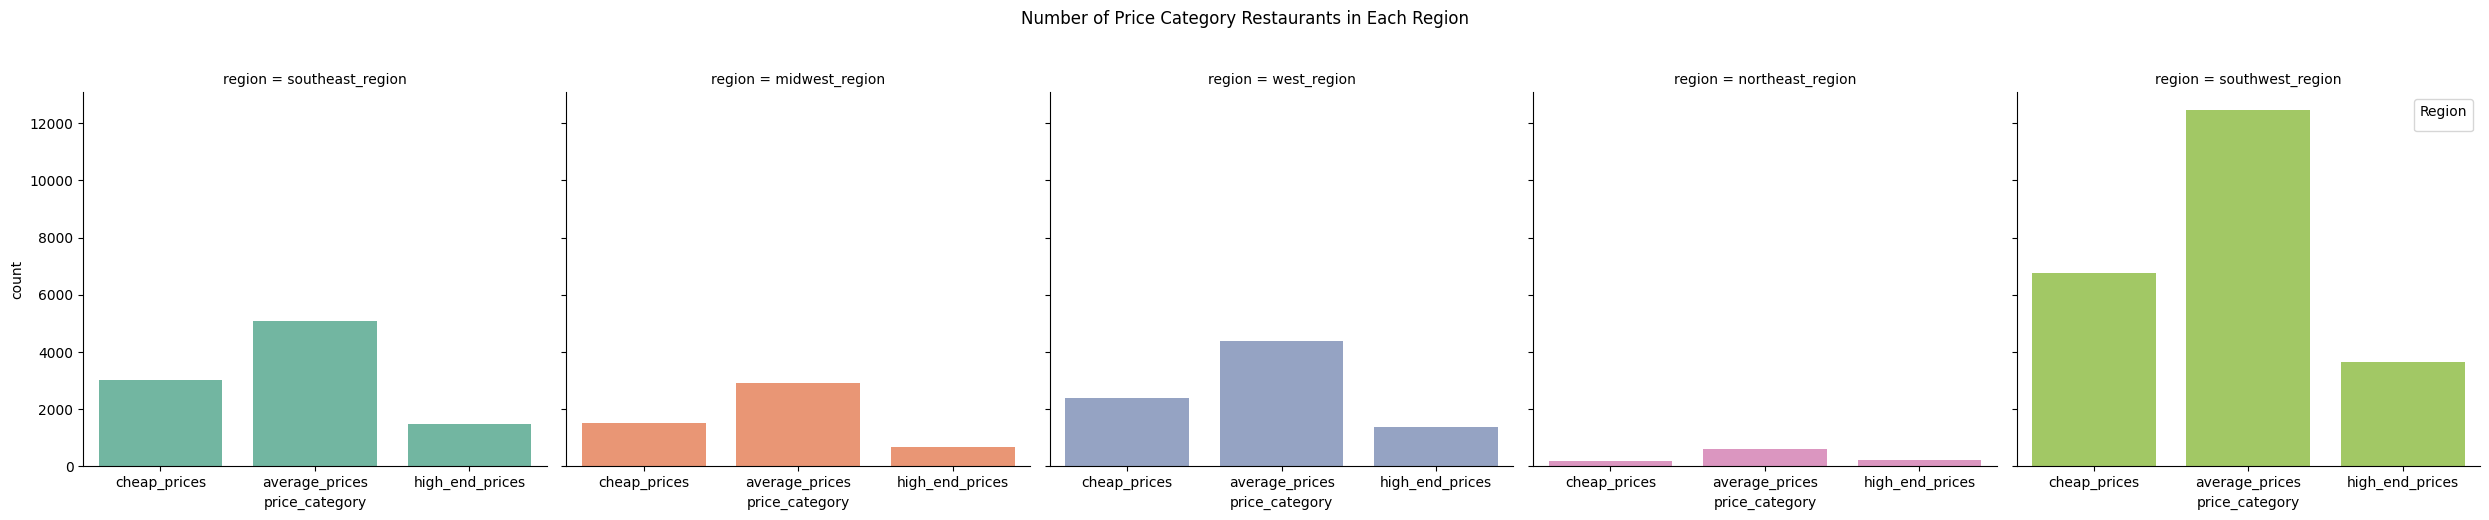

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Filter out rows where price category is not equal to 0
filtered_data = merged_data[merged_data['price_category'] != 0]
# Define the order of price categories
cat_order = ['cheap_prices', 'average_prices', 'high_end_prices']

# Plotting the distribution of different price categories of restaurants in each region
region_price = sns.catplot(x='price_category', 
                           data=filtered_data,  # Use filtered_data to exclude rows with price category 0
                           kind='count', 
                           col='region', 
                           order=cat_order, 
                           hue='region',  # Add hue for region
                           palette='Set2',  # Choose a color palette for regions
                           legend=False)  # Disable legend for better layout

# Set title and adjust layout
region_price.fig.suptitle("Number of Price Category Restaurants in Each Region", y=1.03)
plt.legend(title='Region', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()

By segmenting restaurant pricing into three categories - cheap, average, and high-end - we gain insight into menu pricing disparities across regions. Across all regions, the majority of restaurants fall within the average price range. However, a closer examination of the quantity distribution among these categories reveals a notable trend in the southwest region, where the concentration is notably skewed towards the average price bracket. This nuanced understanding of market segmentation can inform strategic pricing decisions, empowering restaurants to differentiate themselves through competitive pricing strategies, such as offering below-average prices.

Interestingly, the northeast region exhibits a higher proportion of high-end priced restaurants compared to cheaper options. This suggests a consumer base in this region willing to invest in premium dining experiences, even when ordering food for delivery.

In summary, the visualization illustrates the distribution of various price categories across different regions in the USA:

- **Cheap Prices Category:** Restaurants offering meals priced below or equal to $7.64.
- **Average Prices Category:** Establishments with prices ranging between $7.64 - $14.29.
- **High-End Prices Category:** Restaurants with prices above or equal to $14.29.

The data underscores the dominance of restaurants falling within the 'Average Prices Category' across all regions, while also highlighting regional variations in consumer preferences and willingness to pay for food delivery services.

    price_category  number_of_dishes
0                0               NaN
1   average_prices         67.813583
2     cheap_prices         65.643907
3  high_end_prices         50.766428



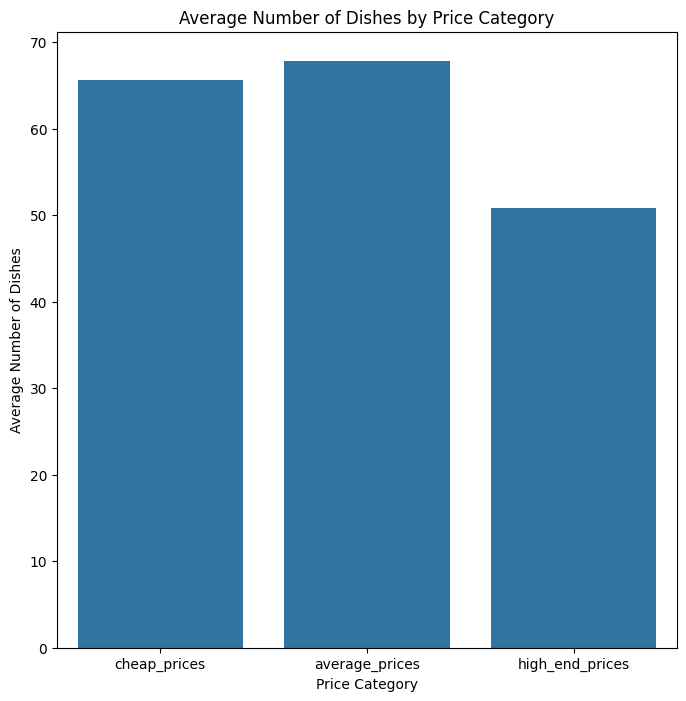

In [ ]:
# Grouping by 'price_category' and calculating the mean number of dishes
price_dishes = merged_data.groupby('price_category')['number_of_dishes'].mean().reset_index()
print(price_dishes)
print('')

# Plotting the bar plot
plt.figure(figsize=(8,8))
cat_order = ['cheap_prices', 'average_prices', 'high_end_prices']
sns.barplot(x='price_category', y='number_of_dishes', data=price_dishes, order=cat_order)
plt.title('Average Number of Dishes by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Average Number of Dishes')
plt.show()

The barplot provides insights into the average number of dishes offered by restaurants across different price categories:

1. **Average Prices Category**: Restaurants categorized under average prices offer an average of approximately 93.6 dishes. This suggests that establishments in this price range typically maintain a diverse menu selection to cater to a broad range of customer preferences. The relatively high number of dishes may indicate a focus on variety and affordability to attract a larger customer base.

2. **Cheap Prices Category**: Restaurants in the cheap price category offer a slightly lower average number of dishes compared to the average price category, with approximately 93.0 dishes on average. Despite the lower pricing, these establishments still maintain a considerable menu variety, indicating a focus on providing value to customers while keeping operational costs low.

3. **High-End Prices Category**: Restaurants categorized as high-end prices offer the highest average number of dishes, with approximately 97.8 dishes. This suggests that higher-priced restaurants prioritize offering extensive menu options, potentially focusing on gourmet or specialty items to justify their premium pricing. The larger menu selection may contribute to enhancing the overall dining experience and catering to discerning customers willing to pay premium prices for quality offerings.


#### *Restaurant Categories*

In [ ]:
#Filtering the restaurants that are positioned 1st, 2nd, and 3rd, respectively on Uber Eats app
r1=restaurants[restaurants['position']==1]
r2=restaurants[restaurants['position']==2]
r3=restaurants[restaurants['position']==3]

#Defining a function to group dataset according to the categories and then plucking out the values & indexes.
plt.style.use('ggplot')
def func (R):
  y1=R.groupby('category_of_restaurant')['name'].count().sort_values(ascending=False)
  y2=y1.values
  x2=y1.index
  size=y2*5
  return (x2,y2,size)
vals1= func(r1)
vals2= func(r2)
vals3= func(r3)
plt.scatter(x=vals1[0],y=vals1[1],s=vals1[2],label='Restaurants positioned 1',alpha=0.7)
plt.scatter(x=vals2[0],y=vals2[1],s=vals2[2],label='Restaurants positioned 2',alpha=0.7)
plt.scatter(x=vals3[0],y=vals3[1],s=vals3[2],label='Restaurants positioned 3',alpha=0.7)
plt.tick_params(axis='x', rotation=90)
plt.ylim(0, 160)
plt.xlabel("Category",fontsize=13)
plt.ylabel("Number of restaurants",fontsize=13)
plt.title("Relation between the number of restaurants and their positions on Uber Eats",fontsize=10)
plt.legend()
plt.show()

KeyError: 'category_of_restaurant'